In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
 housing=pd.read_csv("Data.csv")

## Viewing the data



In [3]:
 housing=pd.read_csv("Data.csv")
 housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##### CRIM- per capita crime rate by town
##### ZN- proportion of residential land zoned for lots over 25,000 sq.ft.
##### INDUS- proportion of non-retail business acres per town
##### CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### NOX- nitric oxides concentration (parts per 10 million)
##### RM -average number of rooms per dwelling
##### AGE- proportion of owner-occupied units built prior to 1940
##### DIS- weighted distances to five Boston employment centres
##### RAD -index of accessibility to radial highways
##### TAX -full-value property-tax rate per 10,000usd
##### PTRATIO- pupil-teacher ratio by town
##### B -1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### 



LSTAT - lower status of the population



In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

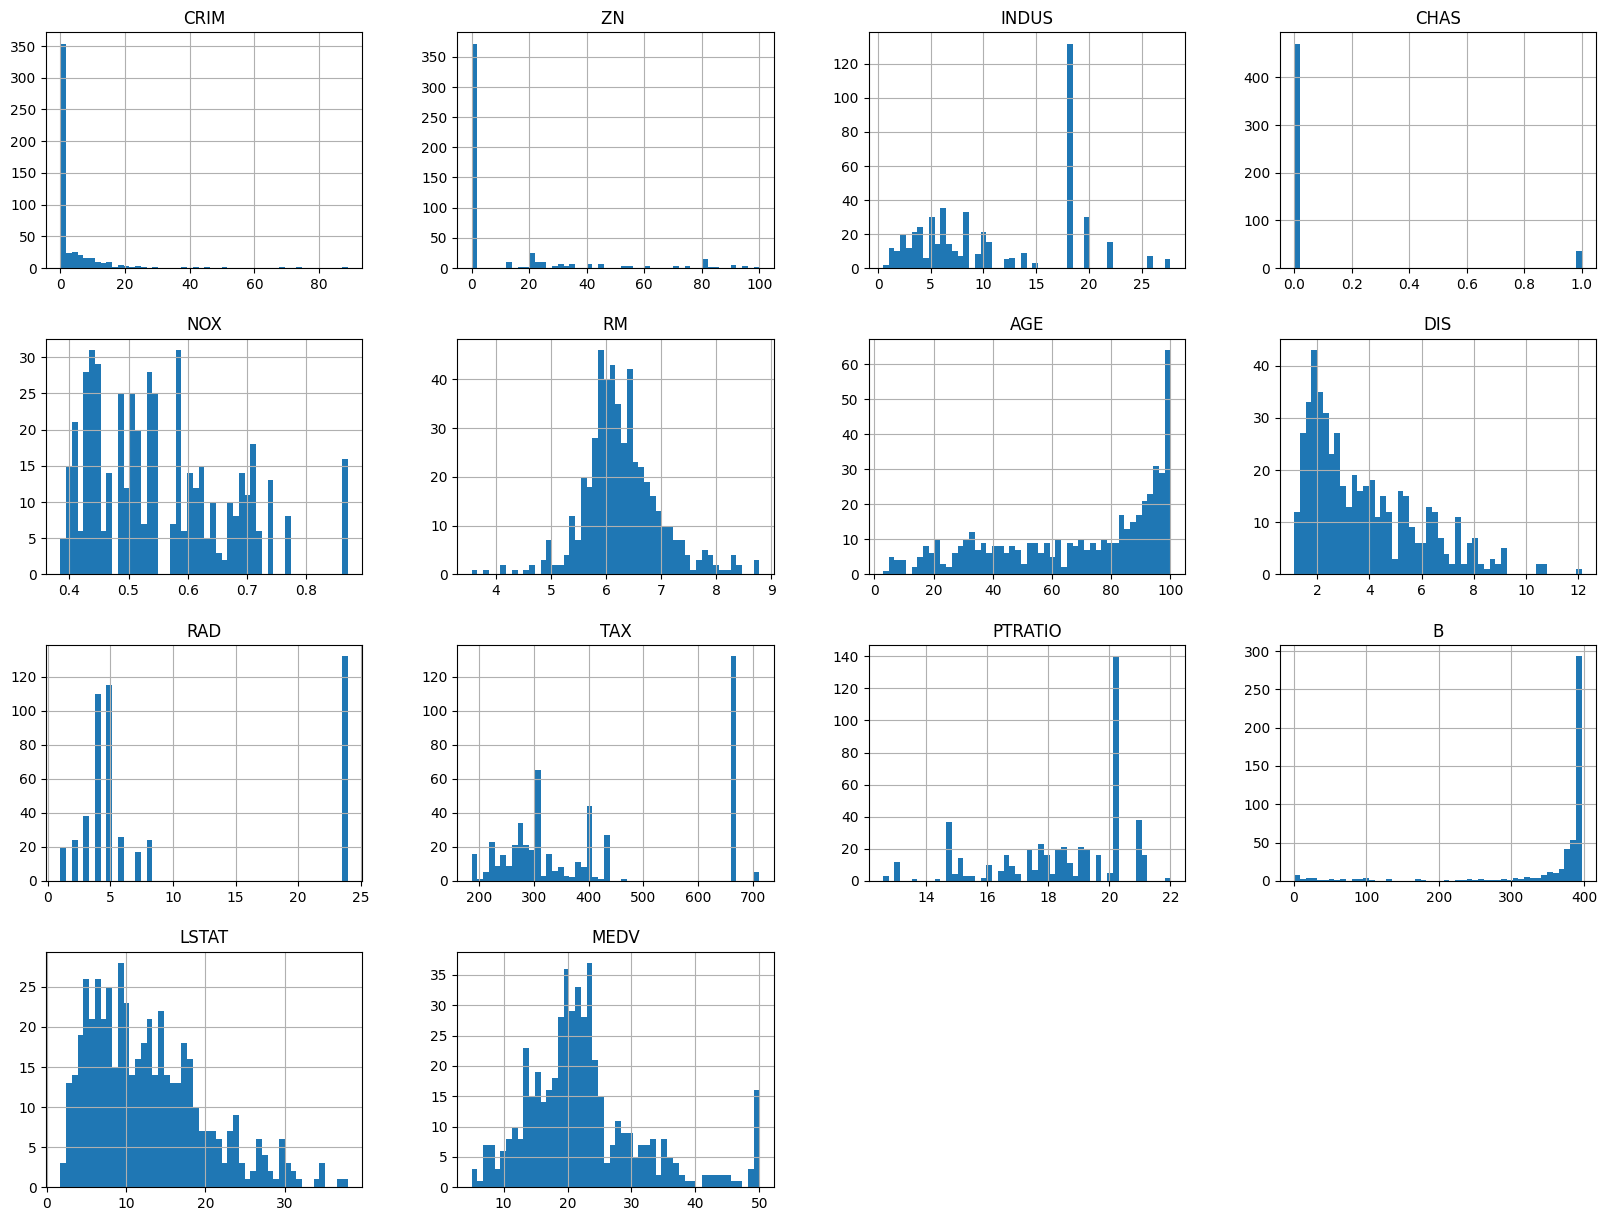

In [9]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Train - Test Splitting

In [10]:
#For learning purpose
def split_train_test(data,test_ratio):
    np.random.seed(42) #ye value isliye le gyi h kyuki permutation wale function me kbhi na kbhi sare data points aa jaege (test data me ) toh overfitting ke chance jyada h , seeding se nhi  hoga
    shuffled=np.random.permutation(len(data)) # Jo length rhega data ka uski random permutation me uski indices ko shuffle krdega
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    
    

In [11]:
# train_set , test_set=split_train_test(housing,0.2)

In [12]:
# print(f"Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)} \nRows in test set:{len(test_set)}")

Rows in train set:404 
Rows in test set:102


### Lets  say chas is imp feature and its not equally distributed in train test splitting so in order to equally cover this follow below

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [16]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
housing=strat_train_set.copy() # Housing ab trainset h

## Looking for Correlations

In [18]:
corr_matrix=housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: >

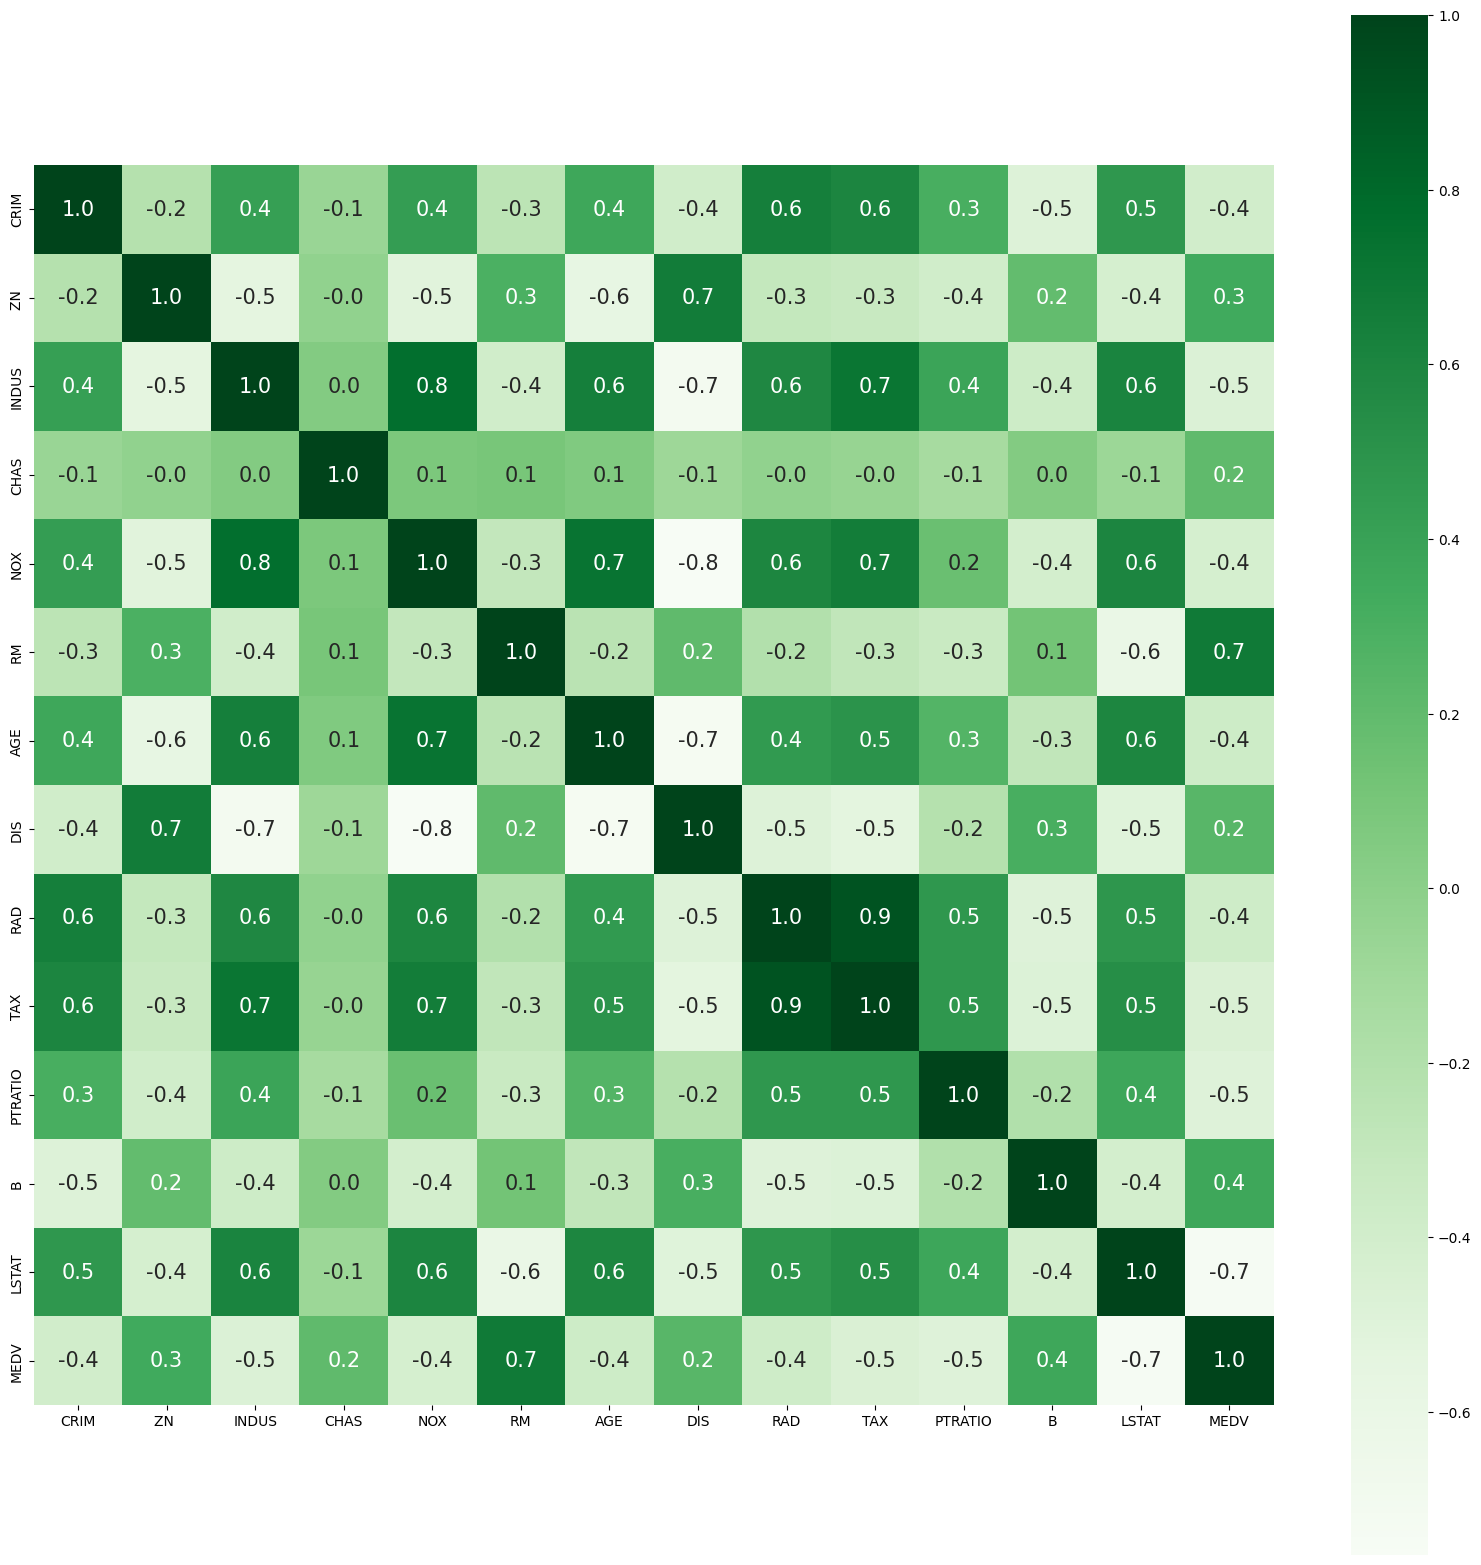

In [20]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN ', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN ', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN ', ylabel='LSTAT'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN '>,
        <AxesSubplot: xlabel='RM', ylabel='ZN '>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN '>,
        <AxesSubplot: xlabel='ZN ', ylabel='ZN '>]], dtype=object)

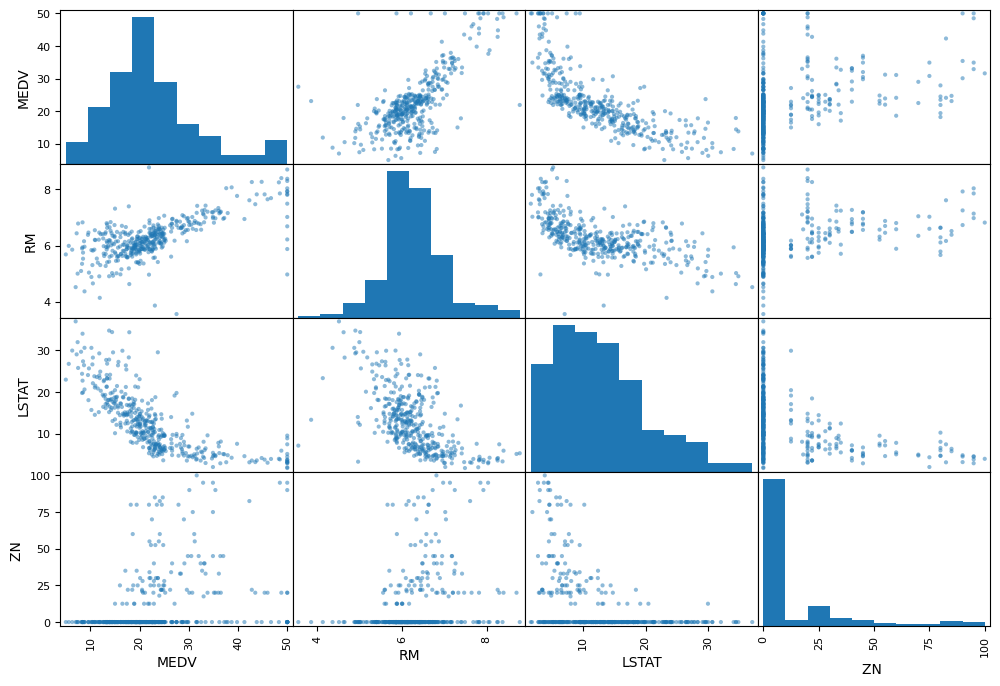

In [21]:

from pandas.plotting import scatter_matrix
attribute=["MEDV","RM","LSTAT","ZN "]
scatter_matrix(housing[attribute],figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

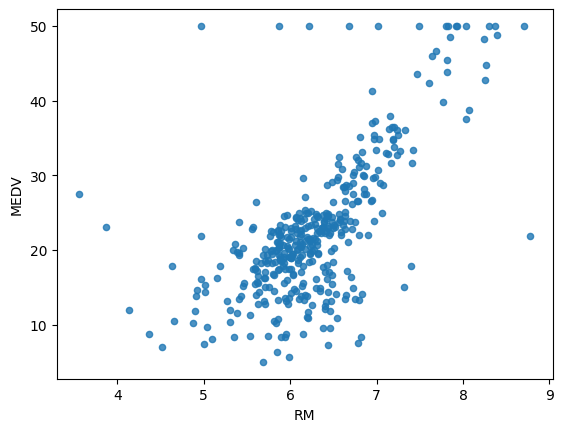

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8) # outliers hta skte h isse corr matrix se  

##  Trying out Attribute combinations

In [23]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [24]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

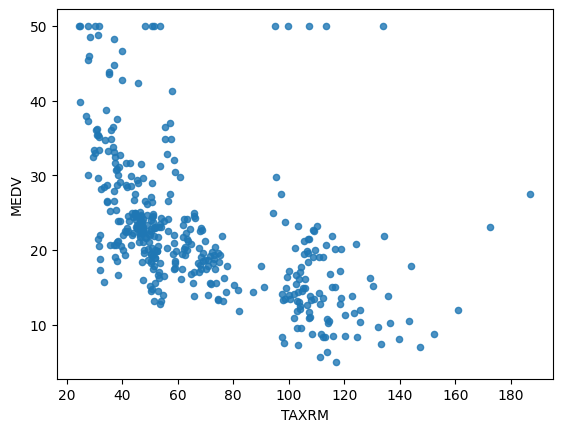

In [27]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [28]:
housing=strat_train_set.drop("MEDV",axis=1) #droping the label
housing_labels=strat_train_set["MEDV"].copy()

## Missing Attributes

 To take care of missing attributes , you hve 3 options:
        1. Get rid of missing data points
        2. Get rid of whole attribute
        3. Set value to 0 , mean or median , if categorical then replace with most repeated one and if numerical then replace with  median

In [29]:
a=housing.dropna(subset=["RM"]) #option 1
a  #original dataframe unchanged

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


In [30]:
housing.drop("RM",axis=1)#option 2  #original dataframe unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [31]:
 median=housing["RM"].median() #computing median for option 3

In [32]:
housing["RM"].fillna(median) #option 3 #original dataframe unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 13)

In [34]:
housing.describe()#before we  started filling missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing) #Median perimeter calculate over nan values

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_ #jo  isne calculate kiye h colums ke liye

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [37]:
X=imputer.transform(housing)# Filling the median values over nan values

In [38]:
X

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [39]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [40]:
housing_tr.describe() # yhe pe jitne  bhi  null values the wo median  ke sath replace ho gye h

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


 ## Scikit-Learn Design

 Primarily, three types of objects
 1. Estimators - It estimate some parameter based on a Dataset . Eg . Imputer
 It has  a fit method and transform method.
 Fit method - Fits the dataset and calculates internal parameter
 
 2. Transformer - transform method takes input and returns output based on the learning from fit (). It also has a convenience function called fit_transform() which fits and then transform.
 3. Predictors - LinearRegression model ex of predictor . fit predtict & predict are 2 common functions. it also gives score function which will  evaluate the predictions.
 

## Feature Scaling

Primarily , 2 types of feature scaling methods:
    1. Min-max scaling (Normalization)
       (value-min/(max-min)) , sklearn provides a class called MinMaxScaler          for this
       
    2. Standardization : (value-mean)/std 
       Sklearn provides a class called StandardScaler for this 

## Creating Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([ #u can add many 
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [42]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [43]:
housing_num_tr=my_pipeline.fit_transform(housing) #ye ek numpy array h,predictor array lega input me

In [44]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [45]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for project

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)


RandomForestRegressor()

In [47]:
some_data=housing.iloc[:5]

In [48]:
some_labels=housing_labels.iloc[:5]

In [49]:
prepared_data=my_pipeline.transform(some_data)

In [50]:
model.predict(prepared_data)

array([22.395, 25.723, 16.728, 23.242, 23.402])

In [51]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model 

In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [53]:
rmse  #Bhut jyada h toh model discarded i.e Linear Regressor ,Decision tree me overfitting h

1.2292638534046003

# Using better evaluation Technique  - Cross Validation

In [54]:
# 1 2 3 4 5 6 7 8 9 10

In [55]:
from  sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [56]:
rmse_scores

array([2.84756309, 2.76907279, 4.35080561, 2.61384626, 3.31343981,
       2.62064232, 4.39553025, 3.24499734, 3.34051155, 3.2873    ])

In [57]:
def print_scores(scores):
    print("Scores :",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())

In [58]:
print_scores(rmse_scores)

Scores : [2.84756309 2.76907279 4.35080561 2.61384626 3.31343981 2.62064232
 4.39553025 3.24499734 3.34051155 3.2873    ]
Mean: 3.2783709019673504
Std: 0.6102151961875137


In [59]:
from joblib import dump,load
dump(model,'Project.joblib') # Saving the model

['Project.joblib']

## Testing the model 




In [60]:
X_test=strat_test_set.drop("MEDV",axis=1) # dropping the label
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.885 11.53  26.015 21.793 18.531 14.804 20.088 14.132 31.599 41.965
 19.564 11.772 24.935 27.249 19.667 10.698 31.587 14.274 23.706 18.845
 19.869 17.808 16.696 22.142 18.539 31.055 15.964 32.642  8.849 33.363
 23.872 21.223 23.037 10.953 20.948 11.168 43.231 24.474 23.36  41.396
 24.183 30.187 20.035 20.937 19.229 33.829 44.553 20.171 19.68  21.603
 21.203 14.645 21.541 14.309 25.588 33.789 41.855 28.841 19.546 20.587
 46.698 10.359 19.224 25.611 14.926 33.368 20.031 18.131 19.659 33.948
 26.392 22.732 21.529 22.545 34.115 13.277 16.197 19.878 20.641 21.26
 21.856 21.172 13.736 22.911 20.473 21.053 14.243 21.494 21.481 23.398
 18.49  27.089  7.083 26.541 18.613 29.322 19.874 31.749 14.448 26.702
 21.551 20.446] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [61]:
final_rmse

2.9341874564198798

## Using Neural  Network with Tensorflow




In [62]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [63]:
housing_num_tr.shape ## Training dataset

(404, 13)

In [64]:
housing_labels.shape ## Labels for training

(404,)

In [65]:
X_test_prepared.shape ## Testing dataset

(102, 13)

In [66]:
Y_test.shape ##Testing labels for evaluation

(102,)

In [67]:
# Set random seed
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_1.compile(
loss=tf.keras.losses.mse,
optimizer=tf.keras.optimizers.Adam(),
metrics=["mse"]
)
history_1=model_1.fit(housing_num_tr,housing_labels,epochs=100)

Epoch 1/100
13/13 [==============================] - 4s 18ms/step - loss: 571.4514 - mse: 571.4514
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 563.4595 - mse: 563.4595
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 555.0928 - mse: 555.0928
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 547.0013 - mse: 547.0013
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 537.9437 - mse: 537.9437
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 528.2468 - mse: 528.2468
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 518.4901 - mse: 518.4901
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 507.7801 - mse: 507.7801
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 496.1023 - mse: 496.1023
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 483.3294 - mse: 483.3294
Epoch 11/100
13/13

Epoch 85/100
13/13 [==============================] - 0s 6ms/step - loss: 23.7423 - mse: 23.7423
Epoch 86/100
13/13 [==============================] - 0s 5ms/step - loss: 23.7892 - mse: 23.7892
Epoch 87/100
13/13 [==============================] - 0s 5ms/step - loss: 23.7265 - mse: 23.7265
Epoch 88/100
13/13 [==============================] - 0s 5ms/step - loss: 23.7041 - mse: 23.7041
Epoch 89/100
13/13 [==============================] - 0s 5ms/step - loss: 23.6544 - mse: 23.6544
Epoch 90/100
13/13 [==============================] - 0s 6ms/step - loss: 23.5604 - mse: 23.5604
Epoch 91/100
13/13 [==============================] - 0s 6ms/step - loss: 23.8599 - mse: 23.8599
Epoch 92/100
13/13 [==============================] - 0s 7ms/step - loss: 23.6482 - mse: 23.6482
Epoch 93/100
13/13 [==============================] - 0s 6ms/step - loss: 23.7116 - mse: 23.7116
Epoch 94/100
13/13 [==============================] - 0s 5ms/step - loss: 23.6064 - mse: 23.6064
Epoch 95/100
13/13 [==========

In [68]:
y_pred_1=model_1.predict(X_test_prepared)

4/4 [==============================] - 0s 2ms/step


In [69]:
model_1.evaluate(X_test_prepared,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 17.4652 - mse: 17.4652


[17.465164184570312, 17.465164184570312]

In [70]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

In [71]:
mae_1=mae(Y_test,y_pred_1)
mse_1=mse(Y_test,y_pred_1)
rmse_1=tf.math.sqrt(mse_1)
mae_1,mse_1,rmse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=3.0765684>,
 <tf.Tensor: shape=(), dtype=float32, numpy=17.465164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.1791344>)

In [72]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model_2.compile(
loss=tf.keras.losses.mse,
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["mse"]
)
history_2=model_2.fit(housing_num_tr,housing_labels,epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 5ms/step - loss: 458.3805 - mse: 458.3805
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 122.8744 - mse: 122.8744
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 38.6269 - mse: 38.6269
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 27.5639 - mse: 27.5639
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 21.6565 - mse: 21.6565
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 18.5657 - mse: 18.5657
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 15.5288 - mse: 15.5288
Epoch 8/500
13/13 [==============================] - 0s 4ms/step - loss: 14.4422 - mse: 14.4422
Epoch 9/500
13/13 [==============================] - 0s 6ms/step - loss: 12.5486 - mse: 12.5486
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 11.5280 - mse: 11.5280
Epoch 11/500
13/13 [===============

Epoch 87/500
13/13 [==============================] - 0s 5ms/step - loss: 5.0613 - mse: 5.0613
Epoch 88/500
13/13 [==============================] - 0s 4ms/step - loss: 4.2046 - mse: 4.2046
Epoch 89/500
13/13 [==============================] - 0s 5ms/step - loss: 4.1622 - mse: 4.1622
Epoch 90/500
13/13 [==============================] - 0s 5ms/step - loss: 3.2621 - mse: 3.2621
Epoch 91/500
13/13 [==============================] - 0s 14ms/step - loss: 2.9576 - mse: 2.9576
Epoch 92/500
13/13 [==============================] - 0s 23ms/step - loss: 3.3499 - mse: 3.3499
Epoch 93/500
13/13 [==============================] - 0s 22ms/step - loss: 3.0142 - mse: 3.0142
Epoch 94/500
13/13 [==============================] - 0s 30ms/step - loss: 3.5705 - mse: 3.5705
Epoch 95/500
13/13 [==============================] - 0s 25ms/step - loss: 3.4257 - mse: 3.4257
Epoch 96/500
13/13 [==============================] - 0s 27ms/step - loss: 3.3965 - mse: 3.3965
Epoch 97/500
13/13 [========================

13/13 [==============================] - 0s 5ms/step - loss: 1.7823 - mse: 1.7823
Epoch 173/500
13/13 [==============================] - 0s 5ms/step - loss: 1.7964 - mse: 1.7964
Epoch 174/500
13/13 [==============================] - 0s 4ms/step - loss: 1.9260 - mse: 1.9260
Epoch 175/500
13/13 [==============================] - 0s 4ms/step - loss: 2.7620 - mse: 2.7620
Epoch 176/500
13/13 [==============================] - 0s 5ms/step - loss: 2.5309 - mse: 2.5309
Epoch 177/500
13/13 [==============================] - 0s 5ms/step - loss: 2.6677 - mse: 2.6677
Epoch 178/500
13/13 [==============================] - 0s 5ms/step - loss: 2.0123 - mse: 2.0123
Epoch 179/500
13/13 [==============================] - 0s 5ms/step - loss: 1.8463 - mse: 1.8463
Epoch 180/500
13/13 [==============================] - 0s 5ms/step - loss: 1.8651 - mse: 1.8651
Epoch 181/500
13/13 [==============================] - 0s 4ms/step - loss: 1.8629 - mse: 1.8629
Epoch 182/500
13/13 [==============================] -

13/13 [==============================] - 0s 6ms/step - loss: 1.2318 - mse: 1.2318
Epoch 258/500
13/13 [==============================] - 0s 6ms/step - loss: 1.1256 - mse: 1.1256
Epoch 259/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1900 - mse: 1.1900
Epoch 260/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1565 - mse: 1.1565
Epoch 261/500
13/13 [==============================] - 0s 5ms/step - loss: 1.2236 - mse: 1.2236
Epoch 262/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3183 - mse: 1.3183
Epoch 263/500
13/13 [==============================] - 0s 4ms/step - loss: 1.5031 - mse: 1.5031
Epoch 264/500
13/13 [==============================] - 0s 5ms/step - loss: 1.5400 - mse: 1.5400
Epoch 265/500
13/13 [==============================] - 0s 4ms/step - loss: 2.0138 - mse: 2.0138
Epoch 266/500
13/13 [==============================] - 0s 5ms/step - loss: 1.7066 - mse: 1.7066
Epoch 267/500
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 0.9232 - mse: 0.9232
Epoch 343/500
13/13 [==============================] - 0s 4ms/step - loss: 0.9275 - mse: 0.9275
Epoch 344/500
13/13 [==============================] - 0s 5ms/step - loss: 1.0141 - mse: 1.0141
Epoch 345/500
13/13 [==============================] - 0s 4ms/step - loss: 1.5920 - mse: 1.5920
Epoch 346/500
13/13 [==============================] - 0s 5ms/step - loss: 1.5069 - mse: 1.5069
Epoch 347/500
13/13 [==============================] - 0s 5ms/step - loss: 1.4150 - mse: 1.4150
Epoch 348/500
13/13 [==============================] - 0s 4ms/step - loss: 1.5884 - mse: 1.5884
Epoch 349/500
13/13 [==============================] - 0s 4ms/step - loss: 1.3839 - mse: 1.3839
Epoch 350/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1039 - mse: 1.1039
Epoch 351/500
13/13 [==============================] - 0s 5ms/step - loss: 1.0647 - mse: 1.0647
Epoch 352/500
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 0.8721 - mse: 0.8721
Epoch 428/500
13/13 [==============================] - 0s 4ms/step - loss: 0.8579 - mse: 0.8579
Epoch 429/500
13/13 [==============================] - 0s 5ms/step - loss: 0.8077 - mse: 0.8077
Epoch 430/500
13/13 [==============================] - 0s 5ms/step - loss: 0.9749 - mse: 0.9749
Epoch 431/500
13/13 [==============================] - 0s 6ms/step - loss: 1.1526 - mse: 1.1526
Epoch 432/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1024 - mse: 1.1024
Epoch 433/500
13/13 [==============================] - 0s 5ms/step - loss: 1.1477 - mse: 1.1477
Epoch 434/500
13/13 [==============================] - 0s 5ms/step - loss: 1.3520 - mse: 1.3520
Epoch 435/500
13/13 [==============================] - 0s 5ms/step - loss: 1.6396 - mse: 1.6396
Epoch 436/500
13/13 [==============================] - 0s 6ms/step - loss: 1.3437 - mse: 1.3437
Epoch 437/500
13/13 [==============================] -

In [73]:
y_pred_2=model_2.predict(X_test_prepared)

4/4 [==============================] - 0s 2ms/step


In [74]:
model_2.evaluate(X_test_prepared,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 10.2247 - mse: 10.2247


[10.224675178527832, 10.224675178527832]

In [75]:
mae_2=mae(Y_test,y_pred_2)
mse_2=mse(Y_test,y_pred_2)
rmse_2=tf.math.sqrt(mse_2)
mae_2,mse_2,rmse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.1214385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.224675>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.1976047>)

In [86]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model_3.compile(
loss=tf.keras.losses.mse,
optimizer=tf.keras.optimizers.SGD(),
metrics=["mse"]
)
history_3=model_3.fit(housing_num_tr,housing_labels,epochs=350)

Epoch 1/350
13/13 [==============================] - 0s 5ms/step - loss: 397.3734 - mse: 397.3734
Epoch 2/350
13/13 [==============================] - 0s 5ms/step - loss: 221.6176 - mse: 221.6176
Epoch 3/350
13/13 [==============================] - 0s 5ms/step - loss: 46.6866 - mse: 46.6866
Epoch 4/350
13/13 [==============================] - 0s 5ms/step - loss: 38.6447 - mse: 38.6447
Epoch 5/350
13/13 [==============================] - 0s 5ms/step - loss: 37.0518 - mse: 37.0518
Epoch 6/350
13/13 [==============================] - 0s 6ms/step - loss: 44.9339 - mse: 44.9339
Epoch 7/350
13/13 [==============================] - 0s 6ms/step - loss: 78.2337 - mse: 78.2337
Epoch 8/350
13/13 [==============================] - 0s 6ms/step - loss: 30.0967 - mse: 30.0967
Epoch 9/350
13/13 [==============================] - 0s 5ms/step - loss: 18.3717 - mse: 18.3717
Epoch 10/350
13/13 [==============================] - 0s 7ms/step - loss: 14.8556 - mse: 14.8556
Epoch 11/350
13/13 [===============

13/13 [==============================] - 0s 4ms/step - loss: 2.9220 - mse: 2.9220
Epoch 87/350
13/13 [==============================] - 0s 4ms/step - loss: 2.9971 - mse: 2.9971
Epoch 88/350
13/13 [==============================] - 0s 4ms/step - loss: 3.3329 - mse: 3.3329
Epoch 89/350
13/13 [==============================] - 0s 4ms/step - loss: 3.3266 - mse: 3.3266
Epoch 90/350
13/13 [==============================] - 0s 4ms/step - loss: 3.6469 - mse: 3.6469
Epoch 91/350
13/13 [==============================] - 0s 4ms/step - loss: 5.0724 - mse: 5.0724
Epoch 92/350
13/13 [==============================] - 0s 4ms/step - loss: 3.9248 - mse: 3.9248
Epoch 93/350
13/13 [==============================] - 0s 4ms/step - loss: 5.9870 - mse: 5.9870
Epoch 94/350
13/13 [==============================] - 0s 4ms/step - loss: 3.7208 - mse: 3.7208
Epoch 95/350
13/13 [==============================] - 0s 4ms/step - loss: 2.8632 - mse: 2.8632
Epoch 96/350
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 9ms/step - loss: 2.6210 - mse: 2.6210
Epoch 172/350
13/13 [==============================] - 0s 7ms/step - loss: 2.3734 - mse: 2.3734
Epoch 173/350
13/13 [==============================] - 0s 7ms/step - loss: 2.4273 - mse: 2.4273
Epoch 174/350
13/13 [==============================] - 0s 7ms/step - loss: 2.5729 - mse: 2.5729
Epoch 175/350
13/13 [==============================] - 0s 7ms/step - loss: 2.9878 - mse: 2.9878
Epoch 176/350
13/13 [==============================] - 0s 5ms/step - loss: 2.3336 - mse: 2.3336
Epoch 177/350
13/13 [==============================] - 0s 5ms/step - loss: 3.8528 - mse: 3.8528
Epoch 178/350
13/13 [==============================] - 0s 5ms/step - loss: 4.7735 - mse: 4.7735
Epoch 179/350
13/13 [==============================] - 0s 6ms/step - loss: 3.6778 - mse: 3.6778
Epoch 180/350
13/13 [==============================] - 0s 6ms/step - loss: 11.2874 - mse: 11.2874
Epoch 181/350
13/13 [==============================]

13/13 [==============================] - 0s 4ms/step - loss: 1.6816 - mse: 1.6816
Epoch 257/350
13/13 [==============================] - 0s 4ms/step - loss: 1.8255 - mse: 1.8255
Epoch 258/350
13/13 [==============================] - 0s 4ms/step - loss: 2.5297 - mse: 2.5297
Epoch 259/350
13/13 [==============================] - 0s 4ms/step - loss: 2.1402 - mse: 2.1402
Epoch 260/350
13/13 [==============================] - 0s 4ms/step - loss: 2.2261 - mse: 2.2261
Epoch 261/350
13/13 [==============================] - 0s 4ms/step - loss: 1.4046 - mse: 1.4046
Epoch 262/350
13/13 [==============================] - 0s 4ms/step - loss: 5.0492 - mse: 5.0492
Epoch 263/350
13/13 [==============================] - 0s 4ms/step - loss: 3.6528 - mse: 3.6528
Epoch 264/350
13/13 [==============================] - 0s 4ms/step - loss: 1.6244 - mse: 1.6244
Epoch 265/350
13/13 [==============================] - 0s 4ms/step - loss: 1.3601 - mse: 1.3601
Epoch 266/350
13/13 [==============================] -

13/13 [==============================] - 0s 4ms/step - loss: 1.1600 - mse: 1.1600
Epoch 342/350
13/13 [==============================] - 0s 5ms/step - loss: 1.6010 - mse: 1.6010
Epoch 343/350
13/13 [==============================] - 0s 4ms/step - loss: 1.3263 - mse: 1.3263
Epoch 344/350
13/13 [==============================] - 0s 6ms/step - loss: 1.3531 - mse: 1.3531
Epoch 345/350
13/13 [==============================] - 0s 5ms/step - loss: 1.2505 - mse: 1.2505
Epoch 346/350
13/13 [==============================] - 0s 5ms/step - loss: 1.1727 - mse: 1.1727
Epoch 347/350
13/13 [==============================] - 0s 6ms/step - loss: 1.2732 - mse: 1.2732
Epoch 348/350
13/13 [==============================] - 0s 4ms/step - loss: 1.3075 - mse: 1.3075
Epoch 349/350
13/13 [==============================] - 0s 5ms/step - loss: 1.3668 - mse: 1.3668
Epoch 350/350
13/13 [==============================] - 0s 4ms/step - loss: 1.6959 - mse: 1.6959


In [87]:
y_pred_3=model_3.predict(X_test_prepared)

4/4 [==============================] - 0s 3ms/step


In [88]:
model_3.evaluate(X_test_prepared,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 7.6572 - mse: 7.6572


[7.657167911529541, 7.657167911529541]

In [89]:
mae_3=mae(Y_test,y_pred_3)
mse_3=mse(Y_test,y_pred_3)
rmse_3=tf.math.sqrt(mse_3)
mae_3,mse_3,rmse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.142492>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.657168>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.7671587>)

In [95]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
model_4.compile(
loss=tf.keras.losses.mse,
optimizer=tf.keras.optimizers.SGD(),
metrics=["mse"]
)
history_4=model_4.fit(housing_num_tr,housing_labels,epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 341.5653 - mse: 341.5653
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 218.3020 - mse: 218.3020
Epoch 3/300
13/13 [==============================] - 0s 7ms/step - loss: 46.0772 - mse: 46.0772
Epoch 4/300
13/13 [==============================] - 0s 7ms/step - loss: 34.9692 - mse: 34.9692
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 28.5568 - mse: 28.5568
Epoch 6/300
13/13 [==============================] - 0s 6ms/step - loss: 36.9362 - mse: 36.9362
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 73.3956 - mse: 73.3956
Epoch 8/300
13/13 [==============================] - 0s 6ms/step - loss: 32.5735 - mse: 32.5735
Epoch 9/300
13/13 [==============================] - 0s 6ms/step - loss: 15.2211 - mse: 15.2211
Epoch 10/300
13/13 [==============================] - 0s 5ms/step - loss: 13.7251 - mse: 13.7251
Epoch 11/300
13/13 [===============

13/13 [==============================] - 0s 7ms/step - loss: 2.2610 - mse: 2.2610
Epoch 87/300
13/13 [==============================] - 0s 6ms/step - loss: 2.1759 - mse: 2.1759
Epoch 88/300
13/13 [==============================] - 0s 10ms/step - loss: 2.9035 - mse: 2.9035
Epoch 89/300
13/13 [==============================] - 0s 7ms/step - loss: 2.3929 - mse: 2.3929
Epoch 90/300
13/13 [==============================] - 0s 7ms/step - loss: 2.9721 - mse: 2.9721
Epoch 91/300
13/13 [==============================] - 0s 8ms/step - loss: 2.9689 - mse: 2.9689
Epoch 92/300
13/13 [==============================] - 0s 7ms/step - loss: 2.6860 - mse: 2.6860
Epoch 93/300
13/13 [==============================] - 0s 7ms/step - loss: 4.6937 - mse: 4.6937
Epoch 94/300
13/13 [==============================] - 0s 6ms/step - loss: 2.5028 - mse: 2.5028
Epoch 95/300
13/13 [==============================] - 0s 5ms/step - loss: 2.1132 - mse: 2.1132
Epoch 96/300
13/13 [==============================] - 0s 6ms/s

13/13 [==============================] - 0s 5ms/step - loss: 1.5901 - mse: 1.5901
Epoch 172/300
13/13 [==============================] - 0s 5ms/step - loss: 1.2735 - mse: 1.2735
Epoch 173/300
13/13 [==============================] - 0s 6ms/step - loss: 1.2800 - mse: 1.2800
Epoch 174/300
13/13 [==============================] - 0s 5ms/step - loss: 1.2735 - mse: 1.2735
Epoch 175/300
13/13 [==============================] - 0s 5ms/step - loss: 1.3467 - mse: 1.3467
Epoch 176/300
13/13 [==============================] - 0s 5ms/step - loss: 1.2111 - mse: 1.2111
Epoch 177/300
13/13 [==============================] - 0s 6ms/step - loss: 1.0192 - mse: 1.0192
Epoch 178/300
13/13 [==============================] - 0s 5ms/step - loss: 1.1338 - mse: 1.1338
Epoch 179/300
13/13 [==============================] - 0s 5ms/step - loss: 1.3223 - mse: 1.3223
Epoch 180/300
13/13 [==============================] - 0s 6ms/step - loss: 2.1614 - mse: 2.1614
Epoch 181/300
13/13 [==============================] -

13/13 [==============================] - 0s 5ms/step - loss: 1.0298 - mse: 1.0298
Epoch 257/300
13/13 [==============================] - 0s 5ms/step - loss: 1.1520 - mse: 1.1520
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 1.7566 - mse: 1.7566
Epoch 259/300
13/13 [==============================] - 0s 5ms/step - loss: 1.3070 - mse: 1.3070
Epoch 260/300
13/13 [==============================] - 0s 6ms/step - loss: 0.9358 - mse: 0.9358
Epoch 261/300
13/13 [==============================] - 0s 6ms/step - loss: 0.8030 - mse: 0.8030
Epoch 262/300
13/13 [==============================] - 0s 7ms/step - loss: 2.2041 - mse: 2.2041
Epoch 263/300
13/13 [==============================] - 0s 6ms/step - loss: 2.5332 - mse: 2.5332
Epoch 264/300
13/13 [==============================] - 0s 7ms/step - loss: 1.0746 - mse: 1.0746
Epoch 265/300
13/13 [==============================] - 0s 7ms/step - loss: 1.5937 - mse: 1.5937
Epoch 266/300
13/13 [==============================] -

In [96]:
y_pred_4=model_4.predict(X_test_prepared)

4/4 [==============================] - 2s 3ms/step


In [97]:
model_4.evaluate(X_test_prepared,Y_test)

4/4 [==============================] - 0s 7ms/step - loss: 6.4919 - mse: 6.4919


[6.491945266723633, 6.491945266723633]

In [98]:
mae_4=mae(Y_test,y_pred_4)
mse_4=mse(Y_test,y_pred_4)
rmse_4=tf.math.sqrt(mse_4)
mae_4,mse_4,rmse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=1.8430424>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.4919453>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5479298>)

In [99]:
import pandas as pd

model_results=[["Model_1",mae_1.numpy(),mse_1.numpy(),rmse_1.numpy()],
               ["Model_2",mae_2.numpy(),mse_2.numpy(),rmse_2.numpy()],
               ["Model_3",mae_3.numpy(),mse_3.numpy(),rmse_3.numpy()],
               ["Model_4",mae_4.numpy(),mse_4.numpy(),rmse_4.numpy()]
               ]
all_results=pd.DataFrame(model_results,columns=["Model","Mae","Mse","Rmse"]) 
all_results

,Model,Mae,Mse,Rmse
0,Model_1,3.076568,17.465164,4.179134
1,Model_2,2.121439,10.224675,3.197605
2,Model_3,2.142492,7.657168,2.767159
3,Model_4,1.843042,6.491945,2.547930


## Conclusion

### Model 4 is best performing model on this data 

In [85]:
model_4.save('Model_4.h5')